<a href="https://www.kaggle.com/code/zeeshanahmadyar/heart-disease-prediction-using-machine-learning?scriptVersionId=289509611" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Heart Disease Prediction Using Machine Learning**
*This notebook presents an end-to-end machine learning pipeline built on the Heart Disease dataset to predict the presence of heart disease in patients.*

***The workflow follows best practices in applied machine learning, including:***

* Understanding and exploring the dataset through structured analysis
* Performing data preprocessing and feature selection
* Training and comparing multiple classification models
* Evaluating model performance using appropriate metrics

The project emphasizes clean code, logical flow, and reproducibility, reflecting a **real-world ML problem-solving** approach rather than just model training.

This notebook is part of my continuous learning journey in **AI & Machine Learning**, where my focus is on building **practical**, scalable, and interpretable ML solutions using **Python and Scikit-Learn**.

The content is structured to be easily understood by **beginners** while still demonstrating a professional ML workflow suitable for portfolios, interviews, and real-world applications.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import random
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# **Generate new data**

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.559535,0.650242,0.982982,1.443268,3.453867,0
1,0.739443,1.620030,1.957151,-1.331596,1.716438,1
2,1.983668,-0.937466,-1.998382,-1.418525,-0.579987,1
3,1.252543,1.574588,2.993758,-1.306317,1.069781,1
4,0.659639,0.645256,-1.029858,-2.113838,1.471182,1


# **Now we create functions for sampling datasets**

In [3]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [4]:
# function for feature sampling
def sample_features(df, percent):
    features = df.columns.tolist()[:-1] # exclude target
    k = int(percent * len(features))
    selected_features = random.sample(features, k)

    new_df = df[selected_features].copy() #You are telling Pandas: “I want a real copy, not a view.”
    new_df['target'] = df['target']
    return new_df

In [5]:
# function for combining sampling
def combine_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [6]:
# sample rows
sample_rows(df, 0.1)

,col1,col2,col3,col4,col5,target
87,0.539133,1.605368,-1.857903,-2.076344,0.259217,0
96,1.473979,-0.064045,0.327341,1.341201,0.128962,0
28,0.816562,1.853506,-1.047298,-1.511798,0.622028,0
11,1.745165,0.874743,1.467823,-1.022758,1.264052,1
17,3.633450,1.322532,2.852112,-1.974930,3.258914,1
30,0.518514,1.975186,3.092197,0.974467,1.168611,1
81,-0.299680,-1.248620,2.114113,2.716421,2.622745,0
74,1.763733,-0.133719,0.423110,0.802596,-0.408263,1
28,0.816562,1.853506,-1.047298,-1.511798,0.622028,0
16,1.947997,1.222506,2.649780,-2.724288,1.265974,1


In [7]:
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

# **Create Model Instance**

In [8]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [9]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [10]:
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])

DecisionTreeClassifier()

In [11]:
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[1] <= 1.297\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[1] <= -0.985\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

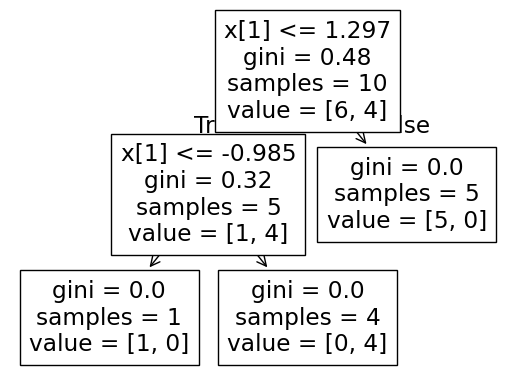

In [12]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'x[1] <= 2.279\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.5, 0.625, 'x[0] <= 0.678\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[3] <= -0.88\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.75, '  False')]

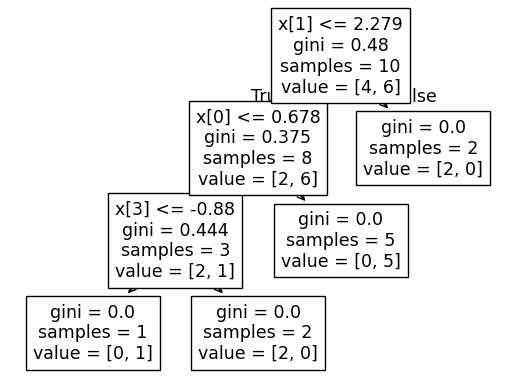

In [13]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'x[2] <= 1.975\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.5, 0.625, 'x[0] <= -0.031\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.159\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.75, '  False')]

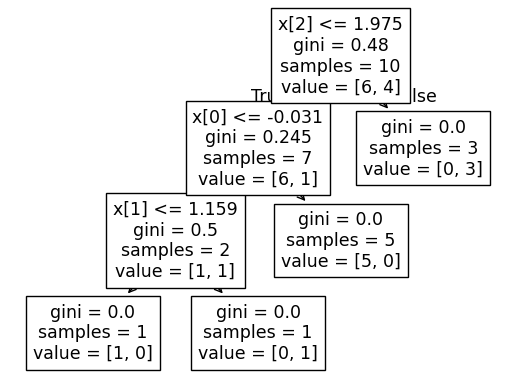

In [14]:
plot_tree(clf3)

In [15]:
clf1.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([1])

In [16]:
clf2.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([1])

In [17]:
clf3.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([0])

# **Features Sampling**

In [18]:
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

In [19]:
sample_features(df, 0.8)

,col4,col1,col3,col2,target
0,1.443268,0.559535,0.982982,0.650242,0
1,-1.331596,0.739443,1.957151,1.620030,1
2,-1.418525,1.983668,-1.998382,-0.937466,1
3,-1.306317,1.252543,2.993758,1.574588,1
4,-2.113838,0.659639,-1.029858,0.645256,1
...,...,...,...,...,...
95,-0.995311,1.963520,3.512304,1.264617,1
96,1.341201,1.473979,0.327341,-0.064045,0
97,1.085283,-0.647533,1.374378,1.620172,1
98,1.849059,1.071465,1.448058,0.788055,0


In [20]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [21]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [22]:
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])

DecisionTreeClassifier()

In [23]:
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6130952380952381, 0.9285714285714286, 'x[2] <= 0.975\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.44047619047619047, 0.7857142857142857, 'x[0] <= 1.293\ngini = 0.42\nsamples = 70\nvalue = [21, 49]'),
 Text(0.5267857142857143, 0.8571428571428572, 'True  '),
 Text(0.23809523809523808, 0.6428571428571429, 'x[3] <= 1.676\ngini = 0.245\nsamples = 35\nvalue = [5, 30]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.795\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.09523809523809523, 0.35714285714285715, 'x[0] <= 0.563\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.047619047619047616, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.14285714285714285, 0.21428571428571427, 'x[2] <= -1.73\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.190476190476

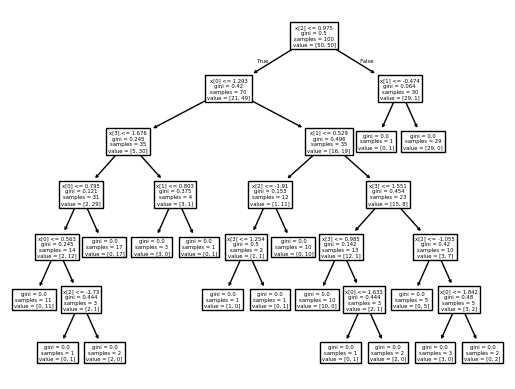

In [24]:
plot_tree(clf1)

[Text(0.6130952380952381, 0.9285714285714286, 'x[0] <= 0.975\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.44047619047619047, 0.7857142857142857, 'x[2] <= 1.293\ngini = 0.42\nsamples = 70\nvalue = [21, 49]'),
 Text(0.5267857142857143, 0.8571428571428572, 'True  '),
 Text(0.23809523809523808, 0.6428571428571429, 'x[3] <= 1.676\ngini = 0.245\nsamples = 35\nvalue = [5, 30]'),
 Text(0.14285714285714285, 0.5, 'x[2] <= 0.795\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.09523809523809523, 0.35714285714285715, 'x[2] <= 0.563\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.047619047619047616, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.14285714285714285, 0.21428571428571427, 'x[0] <= -1.73\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.190476190476

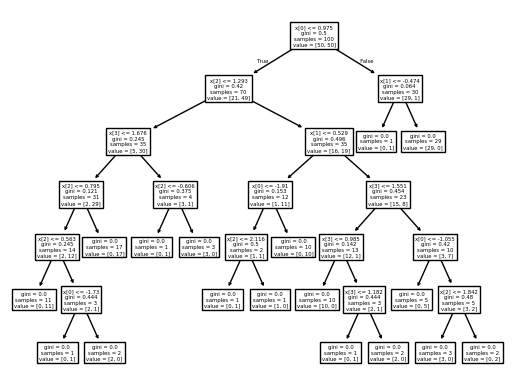

In [25]:
plot_tree(clf2)

[Text(0.6973684210526315, 0.9285714285714286, 'x[3] <= 0.975\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5, 0.7857142857142857, 'x[1] <= 0.294\ngini = 0.42\nsamples = 70\nvalue = [21, 49]'),
 Text(0.5986842105263157, 0.8571428571428572, 'True  '),
 Text(0.2631578947368421, 0.6428571428571429, 'x[2] <= 0.714\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(0.10526315789473684, 0.5, 'x[0] <= -0.041\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.05263157894736842, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15789473684210525, 0.35714285714285715, 'x[1] <= -0.137\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.10526315789473684, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.21052631578947367, 0.21428571428571427, 'x[1] <= -0.002\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15789473684210525, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2631578947368421, 0.0714285714

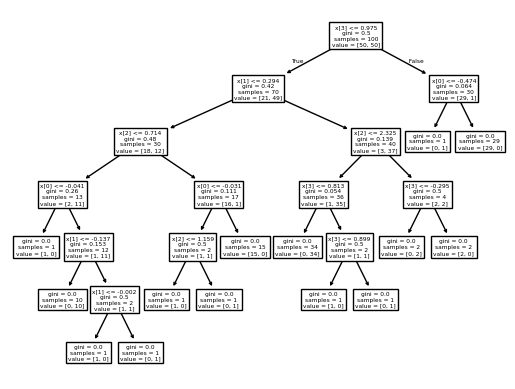

In [26]:
plot_tree(clf3)

In [27]:
clf1.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([1])

In [28]:
clf2.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([1])

In [29]:
clf3.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([1])

# ***Bagging Vs RandomForest***

In [30]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [31]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

In [32]:
print(df.shape)

(100, 6)


In [33]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.284533,-3.888559,-1.753974,-1.117484,-0.616916,0
1,1.591119,-0.800371,-0.735989,2.341821,1.957941,0
2,1.086907,1.502254,-0.169268,4.326960,1.794003,0
3,-1.479302,0.761778,-3.324661,-1.041741,-1.296933,1
4,-3.004935,3.235219,-1.096668,-1.557004,-1.256654,1


# **Bagging Ensemble**

In [34]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:, :5], df.iloc[:, -1])

BaggingClassifier(max_features=2)

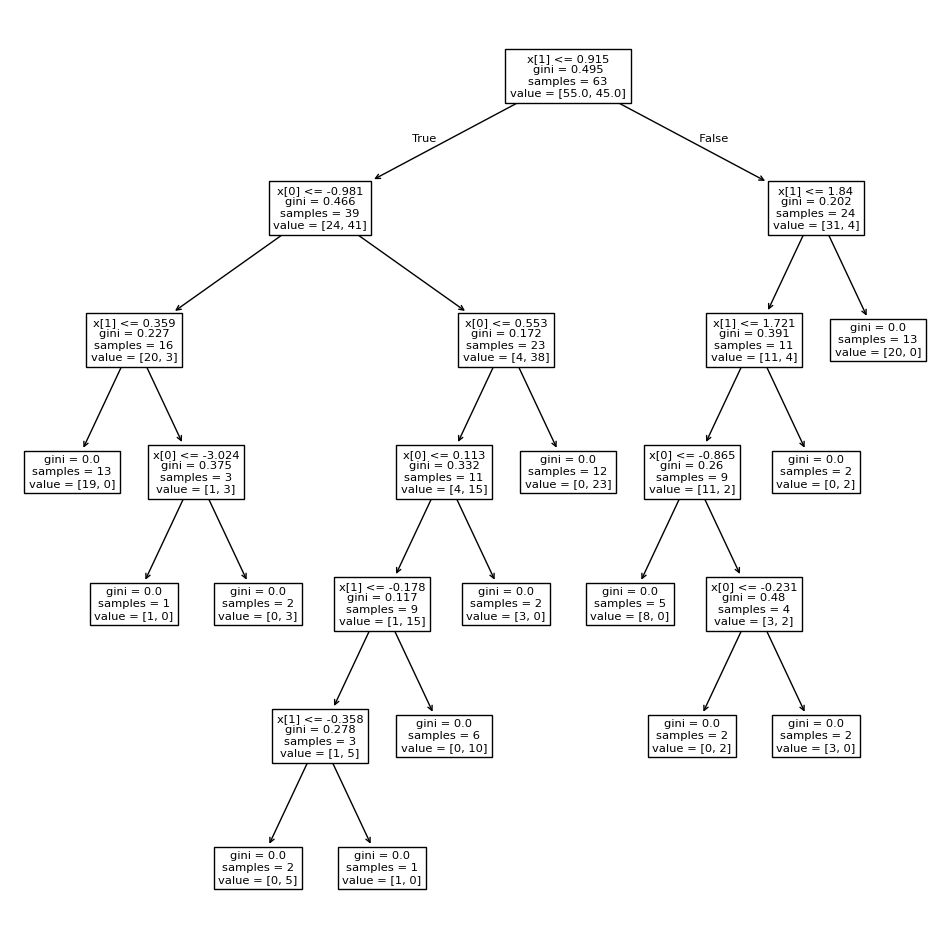

In [35]:
plt.figure(figsize=(12, 12))
plot_tree(bag.estimators_[0])
plt.show() # Only 2 cols show because we can choose max_features=2

# ***RandomForestClassfier***

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(df.iloc[:, :5], df.iloc[:, -1])

RandomForestClassifier()

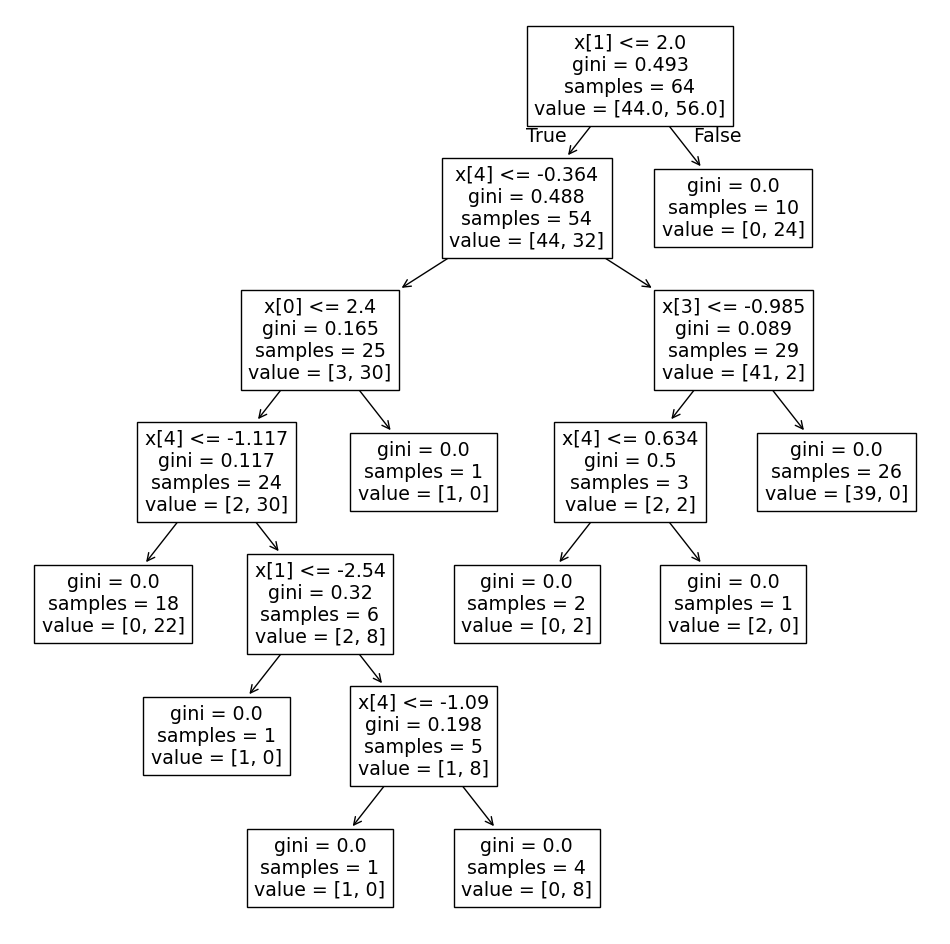

In [38]:
plt.figure(figsize=(12, 12))
plot_tree(rfc.estimators_[1])
plt.show()

# ***Hyperparameter Tuning***
> We can check the best hyperparameter by using  GridSearchCV and RandomizeSearchCV

In [39]:
df1 = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df.shape

(100, 6)

In [41]:
X = df1.iloc[:, 0:-1]
y = df1.iloc[:, -1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
rf = RandomForestClassifier()

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = rf.predict(X_test)

In [46]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9805194805194806


In [47]:
gb = GradientBoostingClassifier()
svc = SVC(probability=True)
lr = LogisticRegression()

In [48]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
y_pred_gb = gb.predict(X_test)

In [50]:
print('Accuracy Gradient Boosting:', accuracy_score(y_test, y_pred_gb))

Accuracy Gradient Boosting: 0.9512987012987013


In [51]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [52]:
y_pred_svc = svc.predict(X_test)

In [53]:
print('Accuracy SVC:', accuracy_score(y_test, y_pred_svc))

Accuracy SVC: 0.6753246753246753


In [54]:
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_lr = lr.predict(X_test)

In [56]:
print('Accuracy Logistic Regression:', accuracy_score(y_test, y_pred_lr))

Accuracy Logistic Regression: 0.8181818181818182


In [57]:
models_accuracy = {
    'GradientBoosting': 0.9512987012987013,
    'SVC': 0.6753246753246753,
    'LogisticRegression': 0.8181818181818182
}

# **Sort the model score**

In [58]:
sorted_score = sorted(models_accuracy.items(), key=lambda x: x[1], reverse=True)

In [59]:
for rank, (name, score) in enumerate(sorted_score, start=1):
    print(f'{rank} --> {name}: {np.round(score, 2)}')

1 --> GradientBoosting: 0.95
2 --> LogisticRegression: 0.82
3 --> SVC: 0.68


# **Checking by Cross Validation**

In [60]:
np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.9970588235294118)

# **Grid Search CV**
> ***Find the best hyperparameter for the Model by using GridSearchCV***

In [61]:
n_estimators = [20, 50, 100, 150]
max_features = [0.2, 0.6, 1.0]
max_depth = [2, 8, None]
max_samples = [0.5, 0.75, 1.0]

In [62]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'max_samples': max_samples
}

In [63]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=2, n_jobs=-1)

In [64]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.3s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 50, 100, 150]},
             verbose=2)

In [65]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 50}